## 1. Setup and Load Data

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
import cv2
import imghdr
import matplotlib.pyplot as plt

C:\Users\Manan V. Vaishnav\AppData\Local\Temp\ipykernel_10340\2011824555.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'Images'

In [6]:
# os.listdir(os.path.join(data_dir, 'Happy')) # for all images of happy folder

In [7]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
image_extensions

['jpeg', 'jpg', 'bmp', 'png']

In [9]:
# img1 = cv2.imread(os.path.join('Images', 'Sad', 'sad1.jpg'))
# img1.shape

In [10]:
# plt.imshow(img1)  #it shows BGR image

In [11]:
# for see the orignal image
# plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [12]:
for image_class in os.listdir(data_dir): # for every images in Image folder
    for image in os.listdir(os.path.join(data_dir, image_class)):  # for every images in Image foldr's sub folders
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)  # for opening a image
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Some issue with image {}'.format(image_path))
        

## Load the Data

In [13]:
# tf.data.Dataset??   # it is an API that supports writing descriptive and efficient input pipelines. 

In [14]:
import numpy as np

In [15]:
data = tf.keras.utils.image_dataset_from_directory('Images')

Found 208 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
#get another batch from iterator
batch = data_iterator.next()

In [18]:
len(batch) # here the number 2 represents the images and labels

2

In [19]:
# Images represented as numpy array
batch[1].shape

(32,)

In [20]:
# class 1 = sad people images & class 2 = happy people images
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

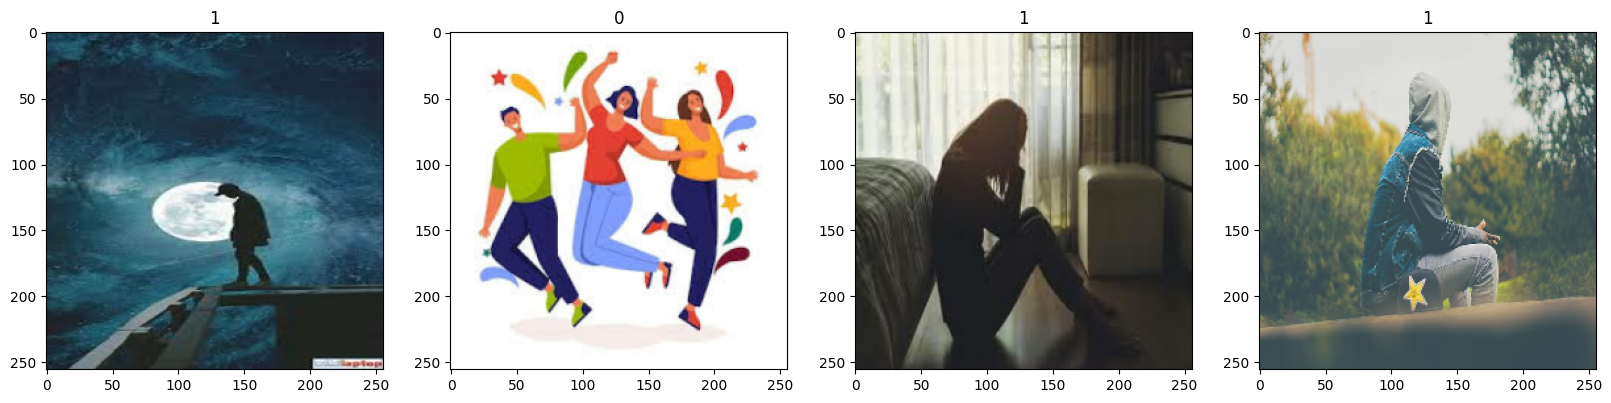

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
# scaled the images between 0 & 1
scaled = batch[0] / 255  # divided by 255 because there are maximum value is 255 and minimum value is 0

In [23]:
scaled.max()

1.0

## 2. Preprocess Data

2.1 Scale data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[0.14509805, 0.15294118, 0.14117648],
          [0.14509805, 0.15294118, 0.14117648],
          [0.14509805, 0.15294118, 0.14117648],
          ...,
          [0.21997549, 0.2435049 , 0.22781862],
          [0.22610295, 0.24963236, 0.23394608],
          [0.22745098, 0.2509804 , 0.23529412]],
 
         [[0.14509805, 0.15294118, 0.14117648],
          [0.14509805, 0.15294118, 0.14117648],
          [0.14509805, 0.15294118, 0.14117648],
          ...,
          [0.22106814, 0.24459755, 0.22891128],
          [0.2257475 , 0.2492769 , 0.23359063],
          [0.22677696, 0.25030637, 0.2346201 ]],
 
         [[0.14509805, 0.15294118, 0.14117648],
          [0.14509805, 0.15294118, 0.14117648],
          [0.14509805, 0.15294118, 0.14117648],
          ...,
          [0.22603473, 0.24956414, 0.23387787],
          [0.22413187, 0.24766128, 0.231975  ],
          [0.22371323, 0.24724264, 0.23155637]],
 
         ...,
 
         [[0.02352941, 0.0627451 , 0.05882353],
          [0.02352

In [26]:
# batch = scaled_iterator.next()

In [27]:
# batch[0].max()

In [28]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

2.2 Split Train Test Data

In [29]:
len(data)

7

In [82]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [83]:
train_size

4

In [84]:
train_data = data.take(train_size) # how much data we take for train
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

## 3.Build Deep Learning Model

3.1 build deep learning model

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [86]:
model = Sequential()

In [87]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [88]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

3.2 Train

In [90]:
logdir = 'logs'

In [91]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [92]:
hist = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 0.8141 - accuracy: 0.5391 - val_loss: 0.6176 - val_accuracy: 0.6250
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.5966 - accuracy: 0.6797 - val_loss: 0.5462 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.5214 - accuracy: 0.7656 - val_loss: 0.3839 - val_accuracy: 0.8438
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.4338 - accuracy: 0.8516 - val_loss: 0.2884 - val_accuracy: 0.9062
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.3299 - accuracy: 0.8516 - val_loss: 0.2686 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.3505 - accuracy: 0.8203 - val_loss: 0.1264 - val_accuracy: 0.9062
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.2884 - accuracy: 0.8516 - val_loss: 0.2039 - val_accuracy: 0.9062
Epoch 8/20
4/4 [=========================

In [ ]:
# hist.history

3.3 Plot

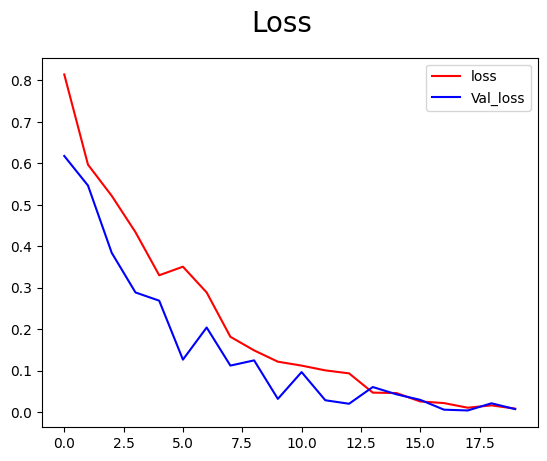

In [93]:
#Visulize Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='Val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

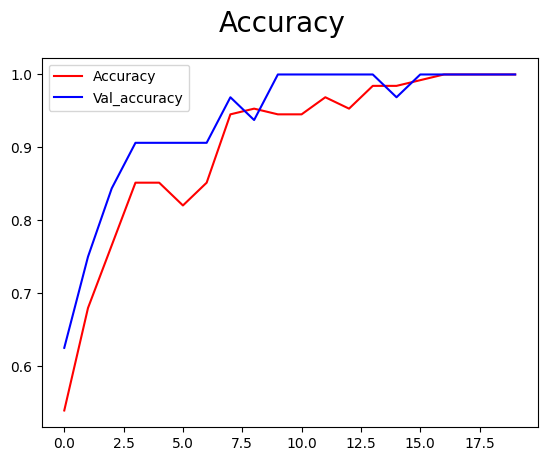

In [94]:
# Vizulize Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='Accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='Val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate Performance

4.1 Evaluate

In [95]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [96]:
# create instance of all imported classes
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [97]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

In [98]:
print(f'Precison: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precison: 0.0, Recall: 0.0, Accuracy: 0.0


4.2 Test

In [99]:
import cv2

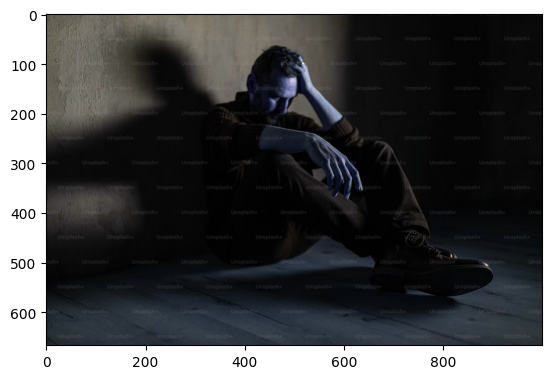

In [101]:
img = cv2.imread('sad2.jpeg')
plt.imshow(img)
plt.show()

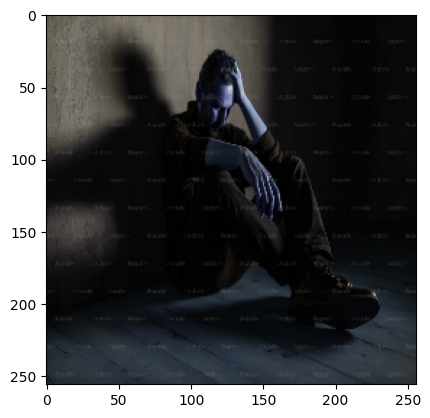

In [102]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 94ms/step


In [104]:
yhat

array([[0.9999999]], dtype=float32)

In [105]:
if yhat > 0.5:
    print('Predicted class is sad')
else:
    print('Predicted class is Happy')

Predicted class is sad


## Model Saving

In [106]:
from tensorflow.keras.models import load_model

In [122]:
model.save(os.path.join('model', 'imageclassifiermodel.keras'))